In [1]:
import matplotlib.pyplot as plt
import numpy as np
import h5py

In [2]:
f = h5py.File('/Users/ahyeon/Desktop/activ misc/optimize_k_mat.h5', 'r')

In [3]:
list(f.keys())

['error', 'k']

In [5]:
error_mat = f['error'][:]

In [6]:
error_mat.shape

(4, 10, 10)

In [8]:
k_mat = f['k'][:]
k_mat.shape

(4, 10, 10)

In [9]:
error_mat = error_mat.mean(axis=2)

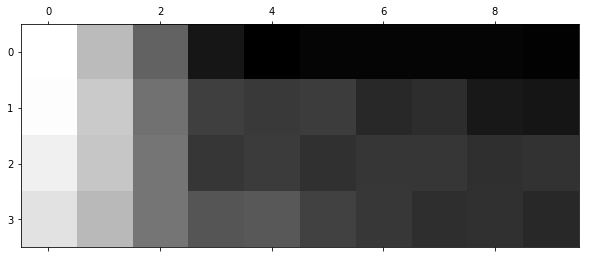

In [11]:
plt.matshow(error_mat, cmap='gray_r')

In [86]:
for x in np.arange(5,55,5)

array([ 5, 10, 15, 20, 25, 30, 35, 40, 45, 50])

In [92]:
xticks = list(map(str, np.arange(5,55,5)))
yticks = list(map(str, np.arange(0.1,1.1,0.1)))

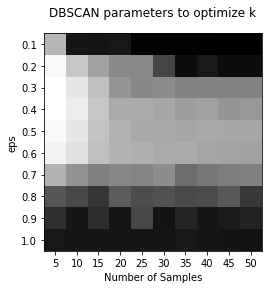

In [97]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(error_mat, cmap='gray_r')

ax.set_xticks(np.arange(0,10))
ax.set_xticklabels(xticks)
ax.set_yticks(np.arange(0,10))
ax.set_yticklabels(yticks)
ax.set_xlabel('Number of Samples')
ax.set_ylabel('eps')
ax.xaxis.set_ticks_position('bottom')
ax.set_title('DBSCAN parameters to optimize k')
plt.savefig('/Users/ahyeon/Desktop/activ misc/dbscan_param_to_optimize_k.pdf')
plt.show()


In [21]:
minval_idx = np.unravel_index(np.argmin(error_mat), error_mat.shape)